# Application: Impulse Response Analysis

We will analyze whether there is a linear dependence between bond and equity markets in EU Blue Chips

$$
\\
$$


**Q.1:** **Do bond and equity markets interact with each other?**
 

$$
\\
$$

**Q.2:** **How do euro-area Blue Chip stock returns respond to a ECB surprise rate hike (reduction)?**

$$
\\
$$

**Q.3:** **Is there a relation between Equity Vol and ECB Policy Rate?**

$$
\\
$$

**Q.4:** **Does the US Fed affect Euro-area Equity and Bond Markets, or their respective Vol?**

In [1]:
import pandas as pd

import statsmodels.tsa.api as sm
from statsmodels.tsa.api import VAR

from scipy.stats import zscore


#  Get Data that you want to analyze

**Euro-Area Bond and Equity Data**

In [2]:
# y_{ecb} from I_... / HandlingBigData with PCA
y_ecb = pd.read_csv('y_ecb_2004_2020_d.csv', parse_dates = True, index_col=0) #dates as strings are converted to pandas dataTime format

# equity return Euro area
r_d = pd.read_csv('r_ES50_d_cleaned_realized.csv', parse_dates = True, index_col=0)

**Quick Look at Bond and Equity DataFrames**

In [3]:
y_ecb.head(1)

,0.25 Y,0.5 Y,1 Y,2 Y,3 Y,5 Y,7 Y,10 Y,20 Y,30 Y
TIME_PERIOD,,,,,,,,,,
2004-09-06,2.001665,2.102528,2.297177,2.655494,2.971161,3.483732,3.86532,4.262767,4.853754,5.056951


In [4]:
y_ecb.tail(1)

,0.25 Y,0.5 Y,1 Y,2 Y,3 Y,5 Y,7 Y,10 Y,20 Y,30 Y
TIME_PERIOD,,,,,,,,,,
2020-08-03,-0.514392,-0.506732,-0.494944,-0.474434,-0.446309,-0.352272,-0.219872,-0.000643,0.527303,0.768387


In [5]:
y_ecb.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4067 entries, 2004-09-06 to 2020-08-03
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0.25 Y  4067 non-null   float64
 1   0.5 Y   4067 non-null   float64
 2   1 Y     4067 non-null   float64
 3   2 Y     4067 non-null   float64
 4   3 Y     4067 non-null   float64
 5   5 Y     4067 non-null   float64
 6   7 Y     4067 non-null   float64
 7   10 Y    4067 non-null   float64
 8   20 Y    4067 non-null   float64
 9   30 Y    4067 non-null   float64
dtypes: float64(10)
memory usage: 349.5 KB


In [6]:
r_d.head(1)

,ADS.DE,AI.PA,ALV.DE,ASML.AS,CS.PA,BBVA.MC,SAN.MC,BAS.DE,BAYN.DE,BMW.DE,...,SU.PA,SIE.DE,TEF.MC,FP.PA,URW.AS,UNA.AS,DG.PA,VIV.PA,VOW.DE,1/N
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-05,-0.023996,-0.009332,-0.004736,-0.100229,-0.015385,-0.022708,-0.024598,-0.038939,-0.026907,-0.019987,...,-0.042903,-0.034424,-0.047851,-0.025479,-0.000945,0.021525,0.022467,-0.024392,-0.037946,-0.022821


In [7]:
r_d.tail(1)

,ADS.DE,AI.PA,ALV.DE,ASML.AS,CS.PA,BBVA.MC,SAN.MC,BAS.DE,BAYN.DE,BMW.DE,...,SU.PA,SIE.DE,TEF.MC,FP.PA,URW.AS,UNA.AS,DG.PA,VIV.PA,VOW.DE,1/N
Date,,,,,,,,,,,,,,,,,,,,,
2020-07-01,-0.00515,-0.006642,-0.01922,-0.005675,-0.016905,-0.025786,-0.021381,-0.024147,-0.002435,-0.014715,...,-0.017548,-0.013067,-0.019737,-0.007682,-0.03283,-0.003604,-0.012023,-0.009679,-0.011934,-0.013222


**Merge Data onto same Time Grid**


In [8]:
y = pd.concat([y_ecb, r_d], axis=1, sort=False)
y = y.dropna()
y.shape

(4042, 54)

In [9]:
y.tail(3)

,0.25 Y,0.5 Y,1 Y,2 Y,3 Y,5 Y,7 Y,10 Y,20 Y,30 Y,...,SU.PA,SIE.DE,TEF.MC,FP.PA,URW.AS,UNA.AS,DG.PA,VIV.PA,VOW.DE,1/N
2020-06-29,-0.487048,-0.475471,-0.454654,-0.416438,-0.375757,-0.274145,-0.146811,0.066135,0.652152,0.963723,...,0.013272,0.018099,0.024855,0.002463,0.011663,-0.025595,0.017311,0.008658,0.010486,0.012619
2020-06-30,-0.475513,-0.475883,-0.472561,-0.450750,-0.411471,-0.295425,-0.152041,0.071903,0.627457,0.904619,...,0.002836,0.010170,-0.016579,-0.016783,0.002795,-0.012200,-0.008984,-0.015639,-0.003483,-0.001748
2020-07-01,-0.489772,-0.482524,-0.467215,-0.430012,-0.381347,-0.252288,-0.097620,0.140320,0.705475,0.971891,...,-0.017548,-0.013067,-0.019737,-0.007682,-0.032830,-0.003604,-0.012023,-0.009679,-0.011934,-0.013222


# Q.1. Good Luck with the Bruto-Force Approach
1. All y variables are fitted to a VAR
 
$$
\\
$$

Why 'good luck'? 
- curse of dimensionality
- multi-collinearity
- run-time
- missing structure

In [10]:
# Put y into a VAR
VAR_model_1 = VAR(y)

/Users/maximulrich/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


**For didactical purpose I show the following although it leads to errors, i.e. learning from mistakes**

In [11]:
#choose optimal lag length
print(VAR_model_1.select_order(22) )

LinAlgError: 54-th leading minor of the array is not positive definite

In [12]:
#Test a VAR(1) fit
VAR_model_1_results = VAR_model_1.fit(1)

In [13]:
VAR_model_1_results.summary() #Warning: Condition Number(!) is (rightly) flagged, ALL Equity tstat / s.e. NAN

/Users/maximulrich/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/vector_ar/var_model.py:1416: RuntimeWarning: invalid value encountered in sqrt
  stderr = np.sqrt(np.diag(self.cov_params()))
/Users/maximulrich/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/Users/maximulrich/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/Users/maximulrich/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Tue, 12, Jan, 2021
Time:                     14:48:14
--------------------------------------------------------------------
No. of Equations:         54.0000    BIC:                   -511.947
Nobs:                     4041.00    HQIC:                  -514.939
Log likelihood:           737089.    FPE:               4.48596e-225
AIC:                     -516.581    Det(Omega_mle):    5.49064e-226
--------------------------------------------------------------------
Results for equation 0.25 Y
                 coefficient       std. error           t-stat            prob
------------------------------------------------------------------------------
const               0.000350         0.004278            0.082           0.935
L1.0.25 Y           0.921419         0.056295           16.368           0.000
L1.0.5 Y            0.083021         0.185528            0.447     

# Q.1 Same Brute-Force, yet, z-score(y) to have returns and yields on same scale 

In [14]:
#z-score
y_z = y.apply(zscore)

In [15]:
#new VAR model
VAR_model_2 = VAR(y_z)

/Users/maximulrich/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [16]:
#Test a VAR(1) fit 
VAR_model_2_results = VAR_model_2.fit(1)

In [17]:
VAR_model_2_results.summary() 

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Tue, 12, Jan, 2021
Time:                     14:48:22
--------------------------------------------------------------------
No. of Equations:         54.0000    BIC:                   -149.356
Nobs:                     4041.00    HQIC:                  -152.348
Log likelihood:           4474.21    FPE:                1.32771e-67
AIC:                     -153.990    Det(Omega_mle):     6.39828e-68
--------------------------------------------------------------------
Results for equation 0.25 Y
                    coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------------
const                 -0.000424         0.000372           -1.139           0.255
L1.0.25 Y              0.921580         0.056294           16.371           0.000
L1.0.5 Y               0.083359         0.187805       

## Observation on Q.1

Clearly, regression output **makes no sense at all**

$$
\\
$$

Think about smart structures instead of simply plugging in everything you like(!!)

# Q.1: 2-dim VAR btw PC1(y_ecb) and PC1(r_d|{1/N})

We know from previous analysis

1. PC1(r_d) explains roughly 50% of equity return variance
$$
\\
$$

2. PC1(r_d) mimicks (close to perfectly) the evolution of r_{1/N}
$$
\\
$$

3. Single Index Model for r_d is well-specified if PC1(r_d) or r_{1/N} is used as the single index
$$
\\
$$

4. PC1(y_ecb) explains more than 90% of variance in y_ecb
$$
\\
$$

5. Return on Bonds equals (approx) change in yield times bond's duration
$$
\\
$$

6. Predictability: daily equity returns have 0 auto-correlation. daily yields have 0.99 auto-correlation

$$
\\
$$

Ergo, we set-up the VAR as follows

$$
y = [PC1_y, r_{1/N}]
$$
 

**Get PC1's**

In [18]:
from ipynb.fs.defs.Helper_PCA import PCA

#initialize class
PCA_y = PCA(y.iloc[:,:y_ecb.shape[1]])

#run PCA
PCA_y.PerformEigenValueDecomposition()

**Set-up 2-dim VAR**

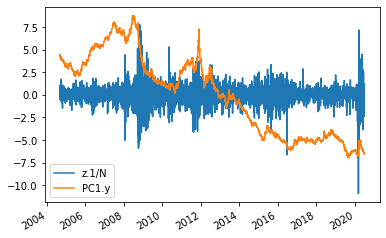

In [19]:
#specify y = (PC1_y, z-score(r_{1/N}))
y2_df = pd.DataFrame()
y2_df["z.1/N"] = zscore(y["1/N"])
y2_df["PC1.y"] = PCA_y.PC[:,0]
y2_df = y2_df.set_index(y.index)

#plot
y2_df.plot()

## Observations on Q.1 (PC approach)

1. **Equity vol clusters** (2008, 2009, 2011, 2012, 2016, 2020) appear to be **accompanied** by **reversals in interest rates**

$$
\rightarrow \text{that might be a cross asset pattern. More research necessary}
$$

2. My eye bowling: 2008: rates drop prior to vol spike in equity. On other times, equity vol spikes first, followed by a drop in rates

In [20]:
#VAR set-up
VAR_model_3 = VAR(y2_df)

#choose optimal lag length
VAR_model_3.select_order(22) 

/Users/maximulrich/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [21]:
print(VAR_model_3.select_order(22))

<statsmodels.tsa.vector_ar.var_model.LagOrderResults object. Selected orders are: AIC -> 8, BIC -> 2, FPE -> 8, HQIC -> 2>


In [22]:
#we use BIC as information criterion
VAR_model_3_results = VAR_model_3.fit(maxlags=22, ic='bic')

VAR_model_3_results.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Tue, 12, Jan, 2021
Time:                     14:48:30
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                   -4.69739
Nobs:                     4040.00    HQIC:                  -4.70747
Log likelihood:          -1934.77    FPE:                 0.00897785
AIC:                     -4.71299    Det(Omega_mle):      0.00895567
--------------------------------------------------------------------
Results for equation z.1/N
              coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------
const           -0.000196         0.015750           -0.012           0.990
L1.z.1/N        -0.015770         0.015747           -1.001           0.317
L1.PC1.y        -0.045791         0.164982           -0.278           0.781
L2.z

## Observation

1. **Equity market induces negative Granger causality on bond market, NOT vice-versa**

Example: Falling equity markets to be followed by falling bond markets (M: odd as contra to flight to liquidity; maybe measurement issues in PC1_y vs r_f) 
i.e.

$$
r_d(t) < 0 \quad \rightarrow \; y_{ecb}(t+1)\; \text{ rises}
$$

$$
\\
$$

Formal visualization via Impulse Response Functions

**IRFs**

In [23]:
#compute IRF for next 5days
irf_model_3 = VAR_model_3_results.irf(5)

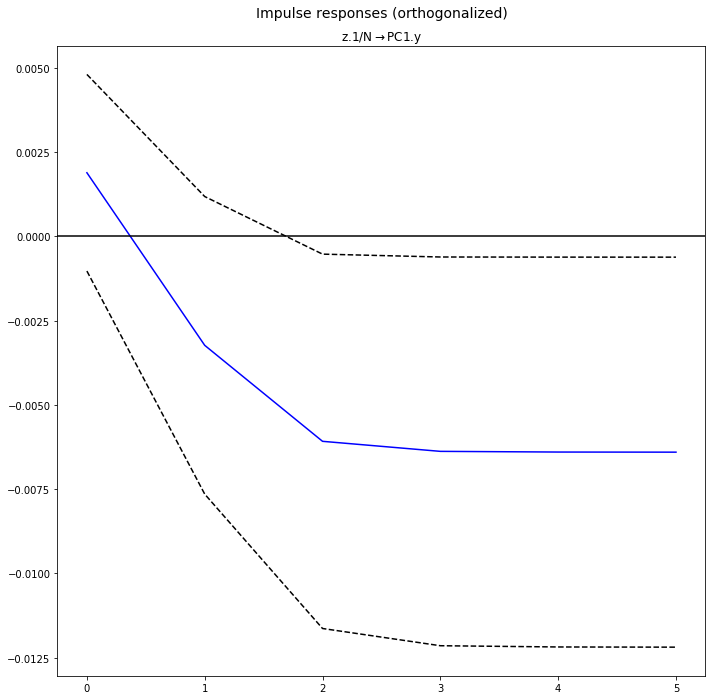

In [24]:
#plot IRF: equity shock on bond yields, 
## CI: 95%, stderr_type: by asymptotic, orth=True means Cholesky decomposition of statistical covariance matrix 
irf_model_3.plot(impulse="z.1/N", response="PC1.y", orth=True, stderr_type="asym", signif=0.05);
 

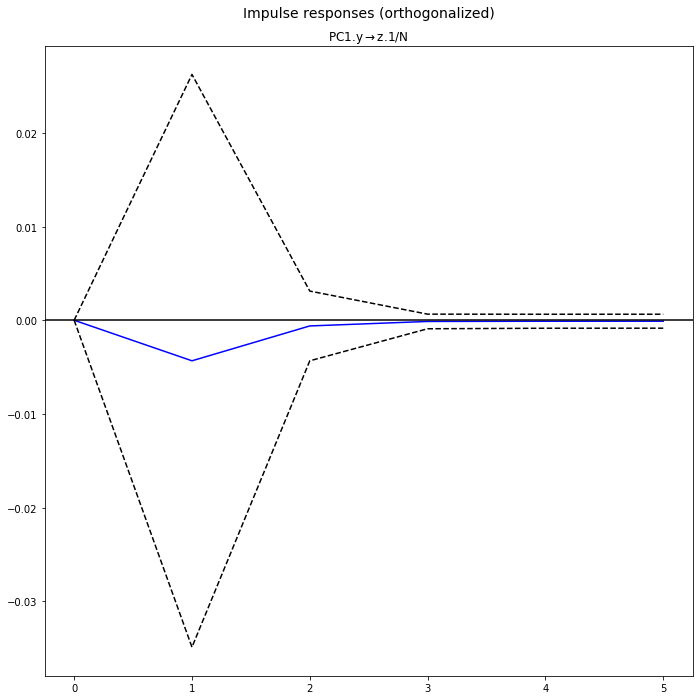

In [25]:
#plot IRF: bond yield shock on equity returns, 
## CI: 95%, stderr_type: by asymptotic
irf_model_3.plot(impulse="PC1.y", response="z.1/N", orth=True, stderr_type="asym", signif=0.05);

## Observation

1. My suspicion from previous observation is confirmed. Although 

$$
\phi_{PC1.y, z.1/N}
$$
$$
\\
$$

was weakly significant (and negative), the IRF reveals the instantaneous Granger impact to be NOT-significant at 5% level. Yet, there is a significant (yet, economically speaking tiny) effect for 2days after the impact.

$$
\\
$$

2. Bond markets do not Granger cause equity markets

# Q.2: 3-dim VAR to capture Monetary Policy, Equity and Bond Markets

- add $y_{3m}$ as monetary policy instrument

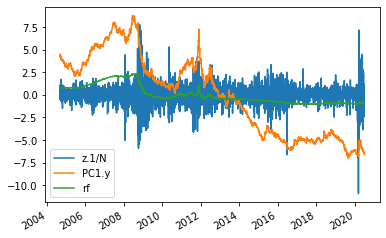

In [26]:
#specify y3 = (y2, y3m)
y3_df = y2_df.copy()
y3_df['rf'] = zscore(y['0.25 Y']) 
y3_df.plot()

In [29]:
#VAR
#VAR set-up
VAR_model_4 = VAR(y3_df)

#we use BIC as information criterion
VAR_model_4_results = VAR_model_4.fit(maxlags=22, ic='bic')  #VAR_model_4.fit(1) #

VAR_model_4_results.summary()



/Users/maximulrich/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Tue, 12, Jan, 2021
Time:                     14:54:21
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                   -12.3696
Nobs:                     4040.00    HQIC:                  -12.3907
Log likelihood:           7876.16    FPE:                4.10902e-06
AIC:                     -12.4023    Det(Omega_mle):     4.08774e-06
--------------------------------------------------------------------
Results for equation z.1/N
              coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------
const           -0.000271         0.015751           -0.017           0.986
L1.z.1/N        -0.016464         0.015760           -1.045           0.296
L1.PC1.y         0.030106         0.184093            0.164           0.870
L1.r

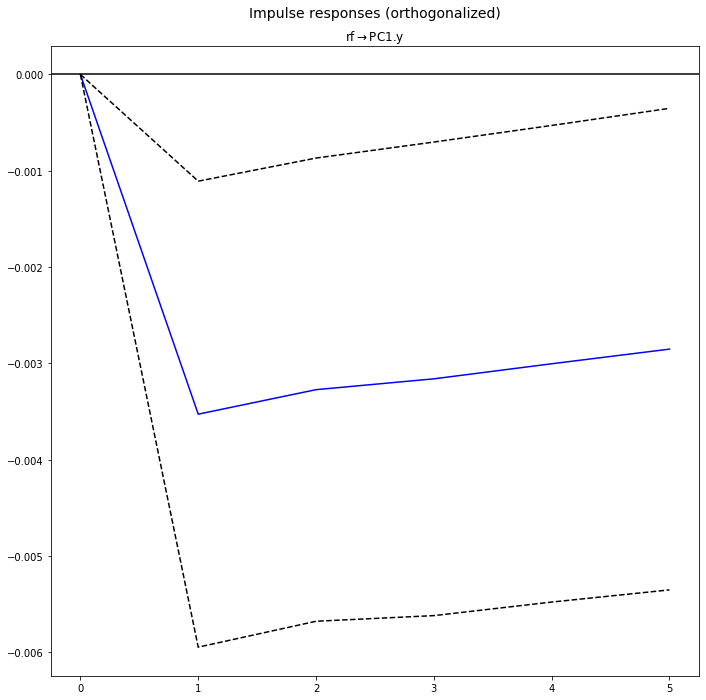

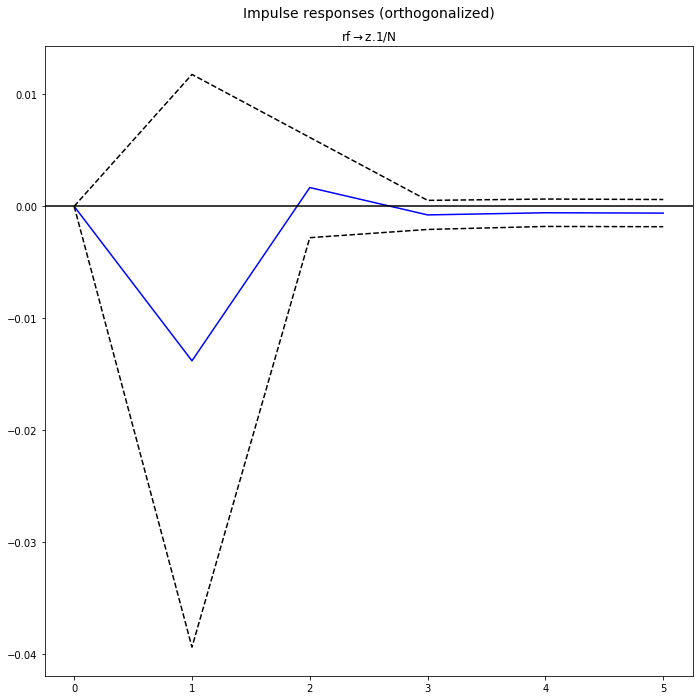

In [30]:
#compute IRF for next 5days
irf_model_4 = VAR_model_4_results.irf(5)

#Surprise ECB hike of rf affects Bond and Equity Markets as follows:
irf_model_4.plot(impulse="rf", response="PC1.y", orth=True, stderr_type="asym", signif=0.1);
irf_model_4.plot(impulse="rf", response="z.1/N", orth=True, stderr_type="asym",   signif=0.1);

## Observations

1. ECB surprise reduction in policy rate increases level of YC. That is odd. Re-doing the exercise with a VAR(1) flips the sign, i.e. higher rf_shock leads to higher y_level.... Tells me VAR model is not well specified.

$$
\\
$$

2. Although equity response is not significant, the point estimate says that a surprise increase of the ECBs policy rate leads next day to negative equity returns. Seems plausible

# Q3: Is there a relation between Equity Vol and ECB Policy Rate?   

- eye bowling suggested pattern that yields affect vol of equity. lets check for that 

In [31]:
#getting vol equity, bond, policy rate

from arch import arch_model 

##GARCH(1,1) 
equityVol =  arch_model(y3_df["z.1/N"], p=1, q=1, mean='zero', vol = 'GARCH', dist = 'normal')  
equityVol_result = equityVol.fit(update_freq=4)

bondVol = arch_model(y3_df["PC1.y"], p=1, q=1, mean='zero', vol = 'GARCH', dist = 'normal')
bondVol_result = bondVol.fit(update_freq=4)

ECBVol =  arch_model(y3_df["rf"], p=1, q=1, mean='zero', vol = 'GARCH', dist = 'normal')
ECBVol_result = ECBVol.fit(update_freq=4)  

##y4
y4_df = y3_df.copy()
y4_df["vol.z.1/N"] =  equityVol_result.conditional_volatility
y4_df["vol.PC1.y"] = bondVol_result.conditional_volatility
y4_df["vol.rf"] = ECBVol_result.conditional_volatility



Iteration:      4,   Func. Count:     26,   Neg. LLF: 4887.724713826941
Iteration:      8,   Func. Count:     49,   Neg. LLF: 4885.524849586005
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 4885.523236534813
            Iterations: 10
            Function evaluations: 59
            Gradient evaluations: 10
Iteration:      4,   Func. Count:     23,   Neg. LLF: 10355.373682435045
Iteration:      8,   Func. Count:     50,   Neg. LLF: 10265.968156624622
Iteration:     12,   Func. Count:     70,   Neg. LLF: 10261.839894619941
Iteration:     16,   Func. Count:     90,   Neg. LLF: 10259.968283680122
Iteration:     20,   Func. Count:    110,   Neg. LLF: 10259.93922098989
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 10259.939219409118
            Iterations: 21
            Function evaluations: 115
            Gradient evaluations: 21
Iteration:      4,   Func. Count:     23,   Neg. LLF: 3805.29845016944

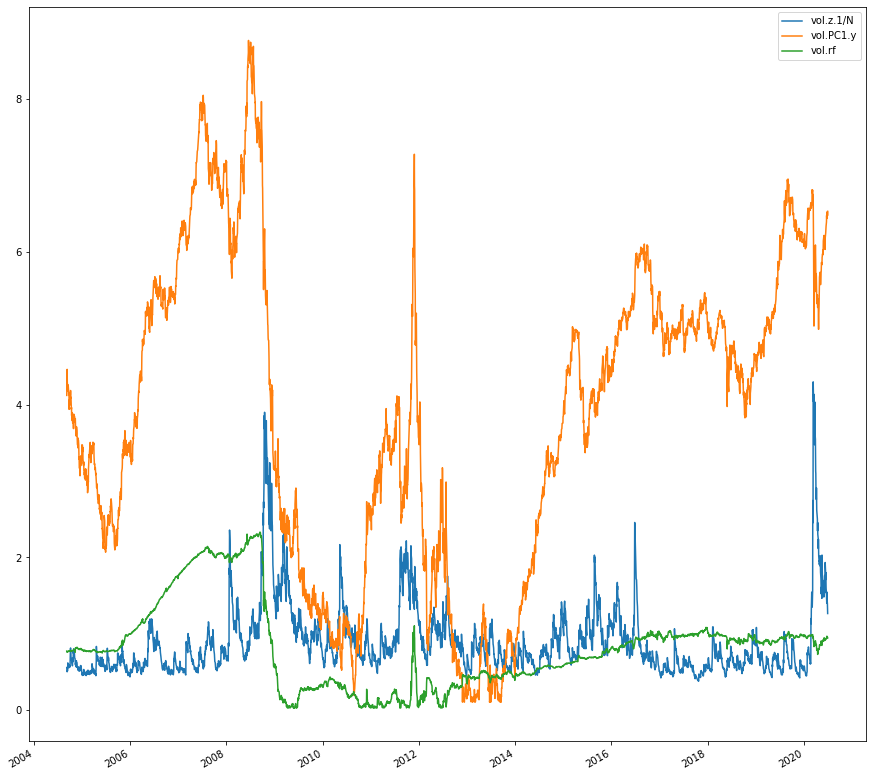

In [32]:
##plot
y4_df.iloc[:,3:].plot(figsize=(15,15))

In [35]:
#VAR
#VAR set-up
VAR_model_5 = VAR(y4_df)

#we use BIC as information criterion
VAR_model_5_results = VAR_model_5.fit(maxlags=22, ic='bic') 

VAR_model_5_results.summary()


/Users/maximulrich/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Tue, 12, Jan, 2021
Time:                     14:58:27
--------------------------------------------------------------------
No. of Equations:         6.00000    BIC:                   -29.8429
Nobs:                     4041.00    HQIC:                  -29.8852
Log likelihood:           26068.5    FPE:                1.02547e-13
AIC:                     -29.9085    Det(Omega_mle):     1.01487e-13
--------------------------------------------------------------------
Results for equation z.1/N
                  coefficient       std. error           t-stat            prob
-------------------------------------------------------------------------------
const                0.108268         0.070226            1.542           0.123
L1.z.1/N            -0.016850         0.015742           -1.070           0.284
L1.PC1.y            -0.023867         0.017733           -1.346 

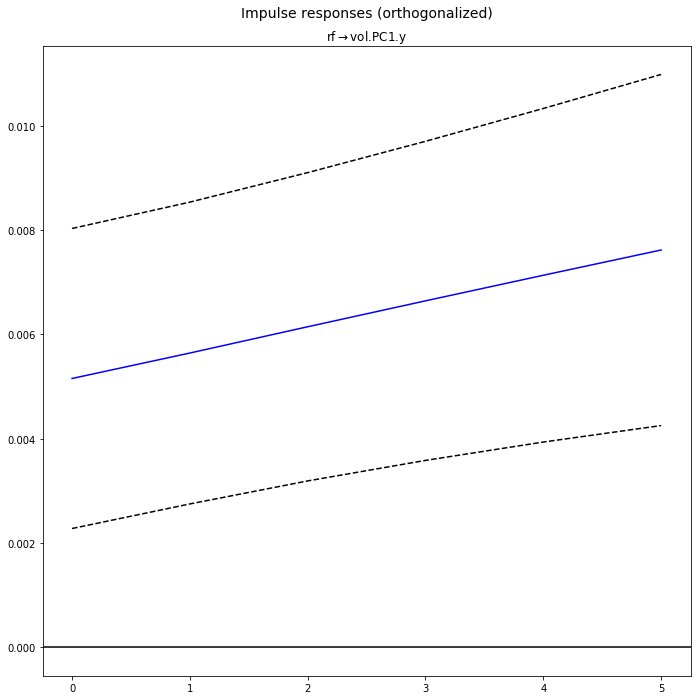

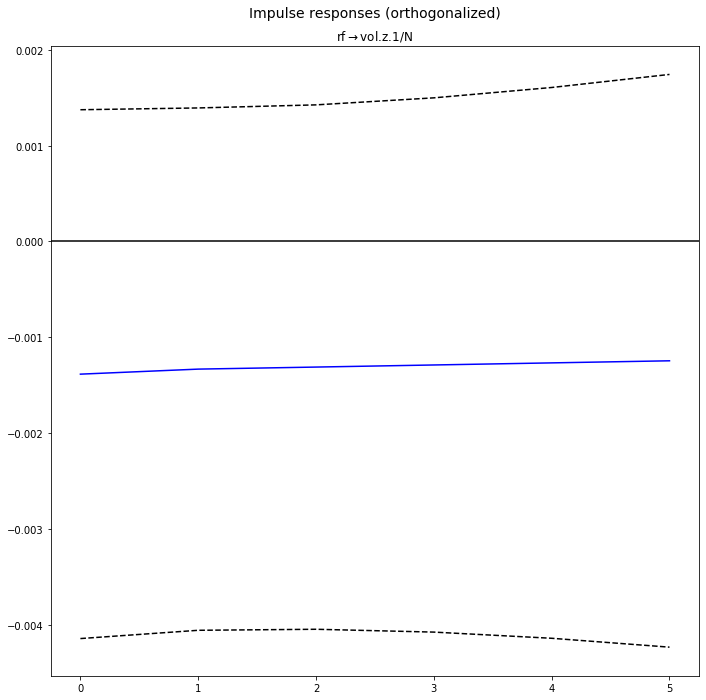

In [36]:
#compute IRF for next 5days
irf_model_5 = VAR_model_5_results.irf(5)

#Surprise ECB hike of rf affects Bond and Equity Market Vol as follows:
irf_model_5.plot(impulse="rf", response="vol.PC1.y", orth=True, stderr_type="asym", signif=0.05);
irf_model_5.plot(impulse="rf", response="vol.z.1/N", orth=True, stderr_type="asym",   signif=0.05);

## Observation

1. **Surprise drop in ECB policy rate** leads to

- **lower bond vol**

- **higher equity vol**. M: confirms eye bowled pattern of Equity Vol reversals AFTER rate reductions... I interpret that as  ECB being perceived as having superior information about the economy

$$
\\
$$

Would it pay off to buy equity options and to sell bond options on days of surprise ECB policy rate drops?

In [ ]:
#does ECB respond to equity   vol?
irf_model_5.plot(impulse="vol.z.1/N", response="rf", orth=True, stderr_type="asym",   signif=0.05);


## Observation

1. ECB lowers policy rate after positive equity vol shocks. M: wrt eye bowling negative relation between equity vol and rates. here we see that the causality seems to go both ways.

# Q4: Does the US Fed affect Euro-area Equity and Bond Markets, or their respective Vol?

In [ ]:
#get y_US
y_US =  pd.read_csv('y_US_2004_2020_d.csv', parse_dates = True, index_col=0)

In [ ]:
#Merge Dates
y5_df = pd.DataFrame()
y5_df = pd.concat([y4_df, y_US["DTB3"]], axis=1, sort=False)
y5_df = y5_df.dropna()
y5_df["DTB3"] = zscore(y5_df["DTB3"] )

y5_df.head(1) 

In [ ]:
#VAR
#VAR set-up
VAR_model_6 = VAR(y5_df)

#we use BIC as information criterion
VAR_model_6_results = VAR_model_6.fit(maxlags=22, ic='bic') 
 
#compute IRF for next 5days
irf_model_6 = VAR_model_6_results.irf(5)

#Surprise Fed hike affects Euro-area Bond and Equity Market & Vol as follows:
irf_model_6.plot(impulse="DTB3", response="rf", orth=True, stderr_type="asym", signif=0.05);
irf_model_6.plot(impulse="DTB3", response="z.1/N", orth=True, stderr_type="asym",   signif=0.05);
irf_model_6.plot(impulse="DTB3", response="PC1.y", orth=True, stderr_type="asym",   signif=0.05);
irf_model_6.plot(impulse="DTB3", response="vol.PC1.y", orth=True, stderr_type="asym", signif=0.05);
irf_model_6.plot(impulse="DTB3", response="vol.z.1/N", orth=True, stderr_type="asym",   signif=0.05);